# Mini Project 2: Students' performance

## Step 1 – Data processing

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/vinaysanga/Student-Performance-Prediction/master/MP2_Data.csv')

In [27]:
df2 = df.sort_index(axis=1)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Grade        107 non-null    int64  
 1   ID           107 non-null    object 
 2   Week1_Stat0  107 non-null    int64  
 3   Week1_Stat1  107 non-null    int64  
 4   Week1_Stat2  107 non-null    int64  
 5   Week1_Stat3  107 non-null    int64  
 6   Week2_Quiz1  107 non-null    float64
 7   Week2_Stat0  107 non-null    int64  
 8   Week2_Stat1  107 non-null    int64  
 9   Week2_Stat2  107 non-null    int64  
 10  Week2_Stat3  107 non-null    int64  
 11  Week3_MP1    107 non-null    float64
 12  Week3_PR1    107 non-null    float64
 13  Week3_Stat0  107 non-null    int64  
 14  Week3_Stat1  107 non-null    int64  
 15  Week3_Stat2  107 non-null    int64  
 16  Week3_Stat3  107 non-null    int64  
 17  Week4_Quiz2  107 non-null    float64
 18  Week4_Stat0  107 non-null    int64  
 19  Week4_St

We can remove 'ID' column as it is just a label

In [29]:
df2 = df2.drop('ID', axis = 1)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Grade        107 non-null    int64  
 1   Week1_Stat0  107 non-null    int64  
 2   Week1_Stat1  107 non-null    int64  
 3   Week1_Stat2  107 non-null    int64  
 4   Week1_Stat3  107 non-null    int64  
 5   Week2_Quiz1  107 non-null    float64
 6   Week2_Stat0  107 non-null    int64  
 7   Week2_Stat1  107 non-null    int64  
 8   Week2_Stat2  107 non-null    int64  
 9   Week2_Stat3  107 non-null    int64  
 10  Week3_MP1    107 non-null    float64
 11  Week3_PR1    107 non-null    float64
 12  Week3_Stat0  107 non-null    int64  
 13  Week3_Stat1  107 non-null    int64  
 14  Week3_Stat2  107 non-null    int64  
 15  Week3_Stat3  107 non-null    int64  
 16  Week4_Quiz2  107 non-null    float64
 17  Week4_Stat0  107 non-null    int64  
 18  Week4_Stat1  107 non-null    int64  
 19  Week4_St

There are no null values

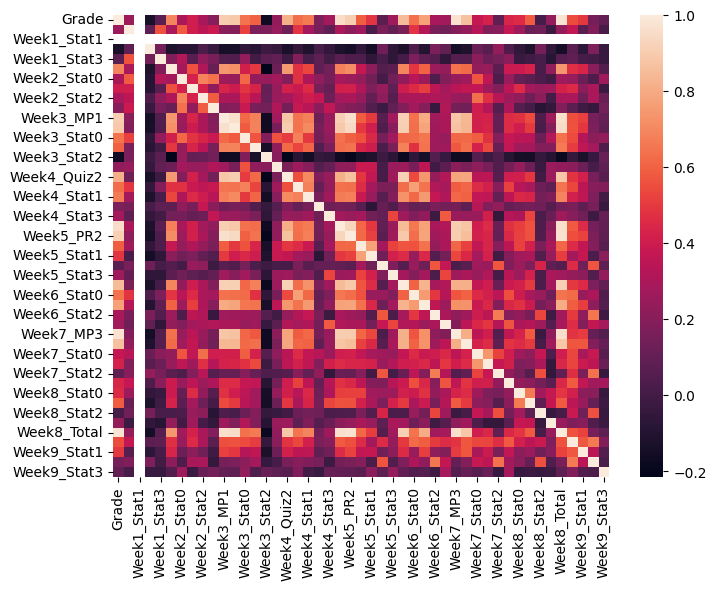

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr())
plt.show()


We can see that Week1_Stat1 has a positive correlation with every other variable, it needs to be dropped.

In [32]:
df2 = df2.drop('Week1_Stat1', axis  = 1)


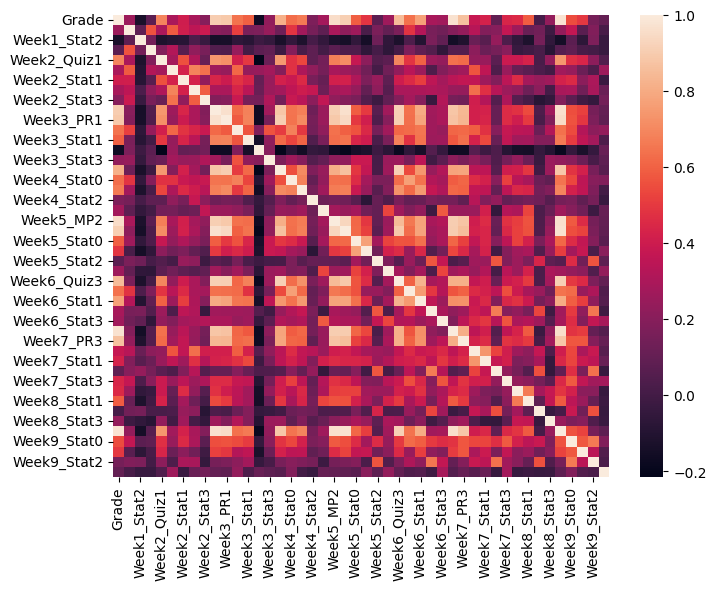

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr())
plt.show()


## Step 2 – Data split: Training and Test sets

In [34]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns='Grade')
y = df2['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## Step 3 – Model Training

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8699537771265079


Use Random Forest to select the top features

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
print(rf.score(X_test, y_test))

0.9898495283018868


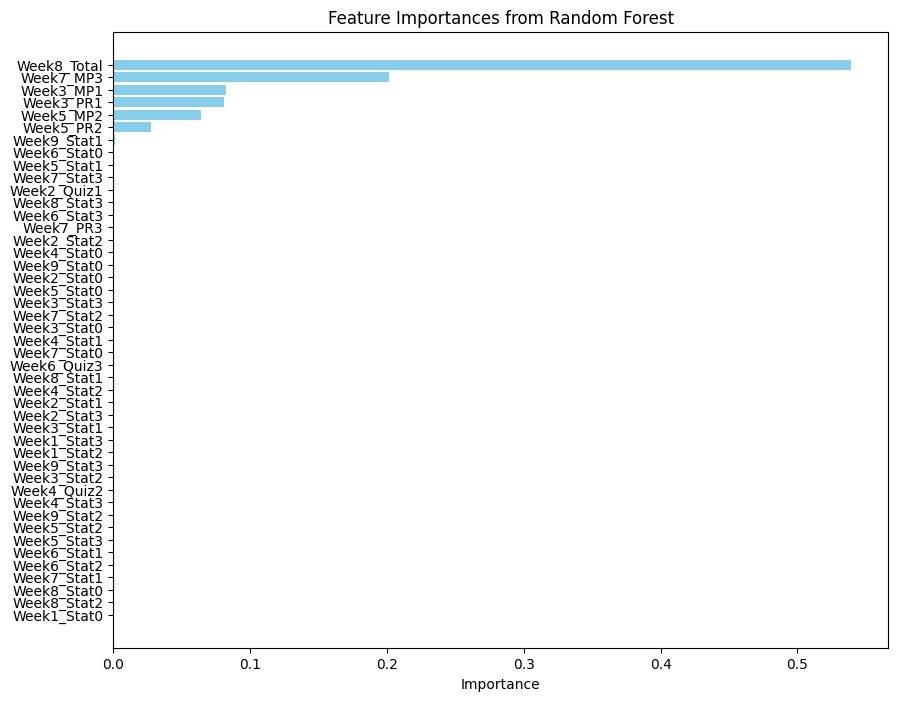

In [37]:
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

sorted_features_df = features_df.sort_values(by='Importance')

plt.figure(figsize=(10, 8))
plt.barh(sorted_features_df['Feature'], sorted_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

We will only select the features which have values greater than 0

In [38]:
sorted_features_df = sorted_features_df[sorted_features_df['Importance'] > 0]

In [39]:
sorted_features_df

,Feature,Importance
7,Week2_Stat3,0.000028
5,Week2_Stat1,0.000028
17,Week4_Stat2,0.000030
37,Week8_Stat1,0.000033
25,Week6_Quiz3,0.000052
32,Week7_Stat0,0.000053
16,Week4_Stat1,0.000059
10,Week3_Stat0,0.000059
34,Week7_Stat2,0.000061
13,Week3_Stat3,0.000075


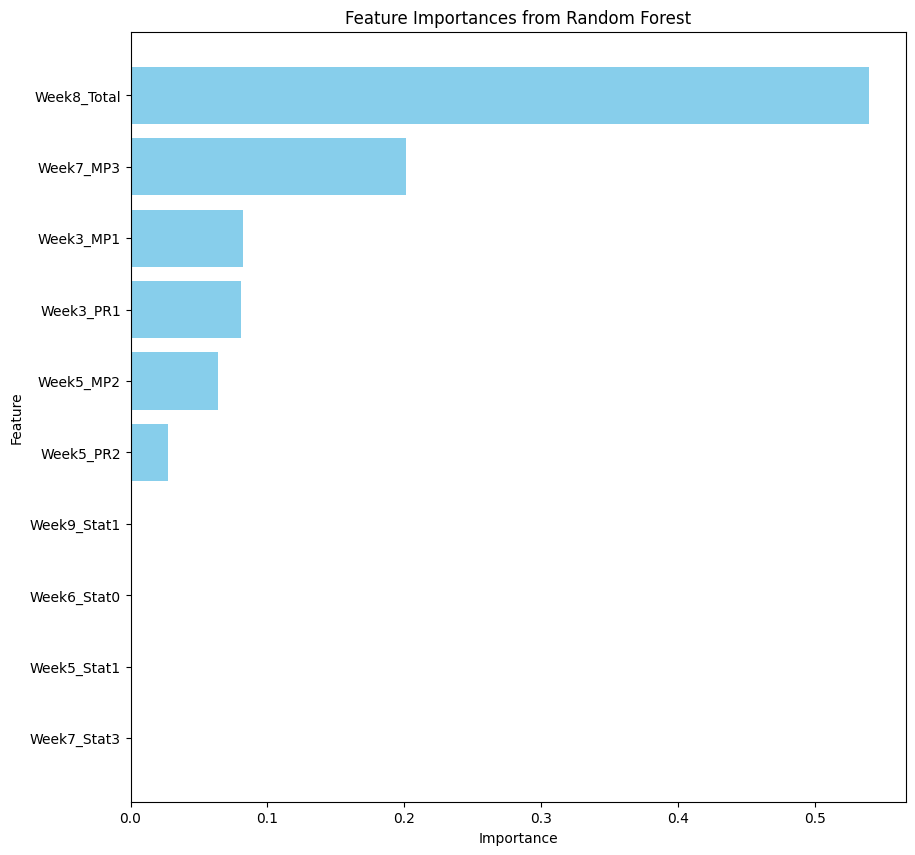

In [40]:
plt.figure(figsize=(10, 10))
plt.barh(sorted_features_df['Feature'].tail(10), sorted_features_df['Importance'].tail(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

In [41]:
sel_features = sorted_features_df['Feature'].tolist()

## Step 4 – Performance Evaluation

In [42]:
def get_score(n):
  top_x = list(reversed(sel_features))[:n]
  X_mod = df2[top_x]
  X_mod_train, X_mod_test, y_mod_train, y_mod_test = train_test_split(X_mod, y, random_state=10)
  lr_score = LinearRegression().fit(X_mod_train, y_mod_train).score(X_mod_test, y_mod_test)
  rf_score = RandomForestRegressor().fit(X_mod_train, y_mod_train).score(X_mod_test, y_mod_test)
  return [lr_score, rf_score, n]

In [43]:
scores = []
for x in range(1, 8):
  scores.append(get_score(x))

In [44]:
scores_df = pd.DataFrame(scores, columns=['LinearRegression', 'RandomForest', 'No_top_features'])

In [45]:
scores_df

,LinearRegression,RandomForest,No_top_features
0,0.933014,0.995046,1
1,0.939334,0.984570,2
2,0.954832,0.990163,3
3,0.938979,0.984633,4
4,0.945708,0.990453,5
5,0.914648,0.991723,6
6,0.913261,0.991220,7


Text(0.5, 0, 'No. of top features')

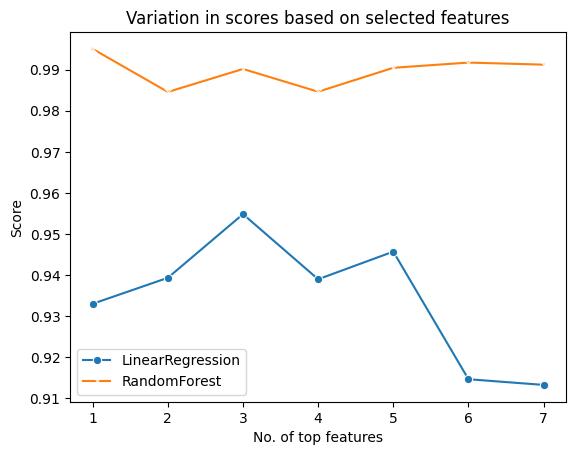

In [46]:
sns.lineplot(y=scores_df['LinearRegression'], x=scores_df['No_top_features'], label='LinearRegression', marker='o')
sns.lineplot(y=scores_df['RandomForest'], x=scores_df['No_top_features'], label='RandomForest', marker='x')
plt.title('Variation in scores based on selected features')
plt.ylabel('Score')
plt.xlabel('No. of top features')

We can see that we get best overall R2 score with top 3 features

## Step 5 – Important features

The top 3 important features are as follows:

In [47]:
list(reversed(sorted_features_df['Feature'].tail(3).tolist()))

['Week8_Total', 'Week7_MP3', 'Week3_MP1']